# Import

In [1]:
import pickle
import statistics as stats
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Load Data

In [2]:
df = pd.read_parquet('churn_gradient.parquet')
df.head()

gender   age married  number_of_dependents  zip_code   latitude  \
Customer ID                                                                    
0002-ORFBO   Female  37.0     Yes                   0.0      41.0  34.827662   
0003-MKNFE     Male  46.0      No                   0.0      70.0  34.162515   
0004-TLHLJ     Male  50.0      No                   0.0     -45.0  33.645672   
0011-IGKFF     Male   NaN     Yes                   0.0      89.0  38.014457   
0013-EXCHZ   Female   NaN     Yes                   0.0      82.0  34.227846   

              longitude  number_of_referrals  tenure_in_months    offer  ...  \
Customer ID                                                              ...   
0002-ORFBO  -118.999073                  2.0               9.0     None  ...   
0003-MKNFE  -118.203869                  0.0               9.0     None  ...   
0004-TLHLJ  -117.922613                  0.0               4.0  Offer E  ...   
0011-IGKFF  -122.115432                  1.0              13.0  Offer D  ...   
0013-EXCHZ  -119.079903                  3.0               3.0     None  ...   

            streaming_movies  streaming_music unlimited_data        contract  \
Customer ID                                                                    
0002-ORFBO                No               No            Yes        One Year   
0003-MKNFE               Yes              Yes             No  Month-to-Month   
0004-TLHLJ                No               No            Yes  Month-to-Month   
0011-IGKFF               Yes               No            Yes  Month-to-Month   
0013-EXCHZ                No               No            Yes  Month-to-Month   

            paperless_billing   payment_method monthly_charge total_refunds  \
Customer ID                                                                   
0002-ORFBO                Yes      Credit Card           65.6           0.0   
0003-MKNFE                 No      Credit Card            NaN           NaN   
0004-TLHLJ                Yes  Bank Withdrawal           73.9           0.0   
0011-IGKFF                Yes  Bank Withdrawal           98.0           0.0   
0013-EXCHZ                Yes      Credit Card           83.9           0.0   

            total_extra_data_charges customer_status  
Customer ID                                           
0002-ORFBO                       0.0          Stayed  
0003-MKNFE                       NaN          Stayed  
0004-TLHLJ                       0.0         Churned  
0011-IGKFF                       0.0         Churned  
0013-EXCHZ                       0.0         Churned  

[5 rows x 31 columns]

# Explore

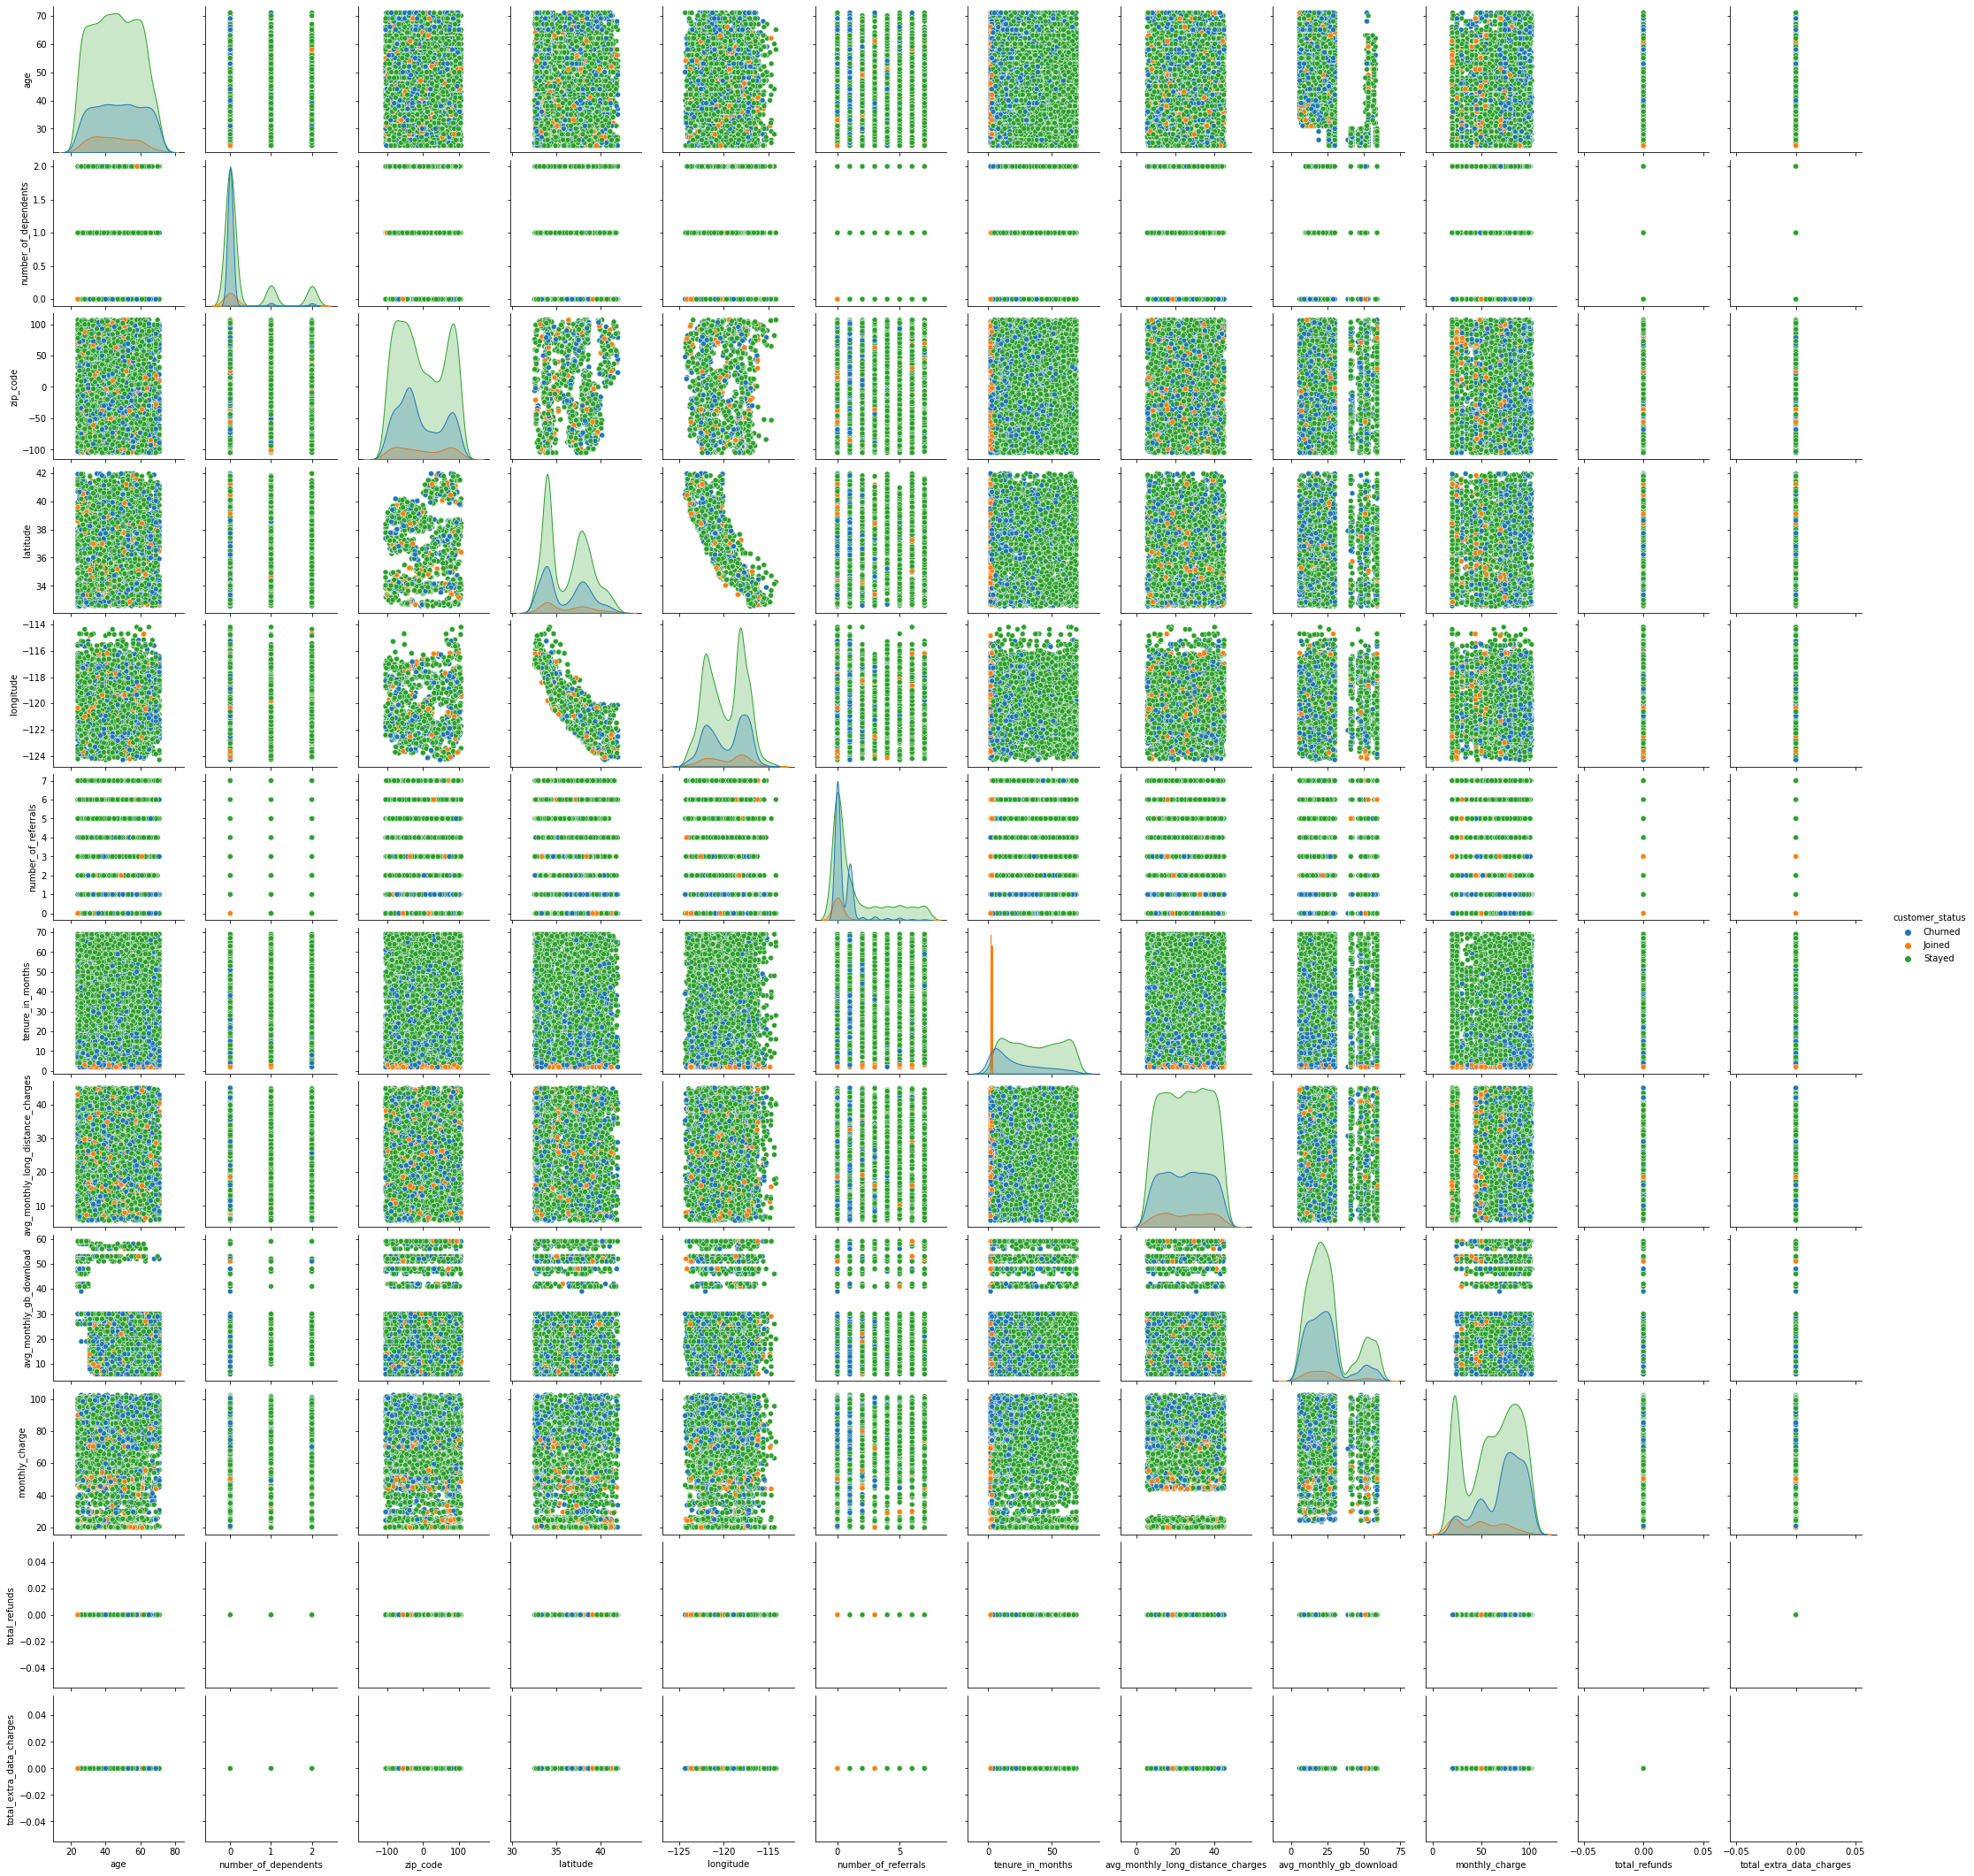

In [3]:
sns.pairplot(df, hue = 'customer_status')

In [4]:
df.number_of_referrals.value_counts()

0.0    3821
1.0    1086
5.0     264
3.0     255
7.0     248
2.0     236
4.0     236
6.0     221
Name: number_of_referrals, dtype: int64

In [5]:
data = df.drop(columns = ['number_of_referrals', 'number_of_dependents', 'total_extra_data_charges', 'total_refunds']).copy()

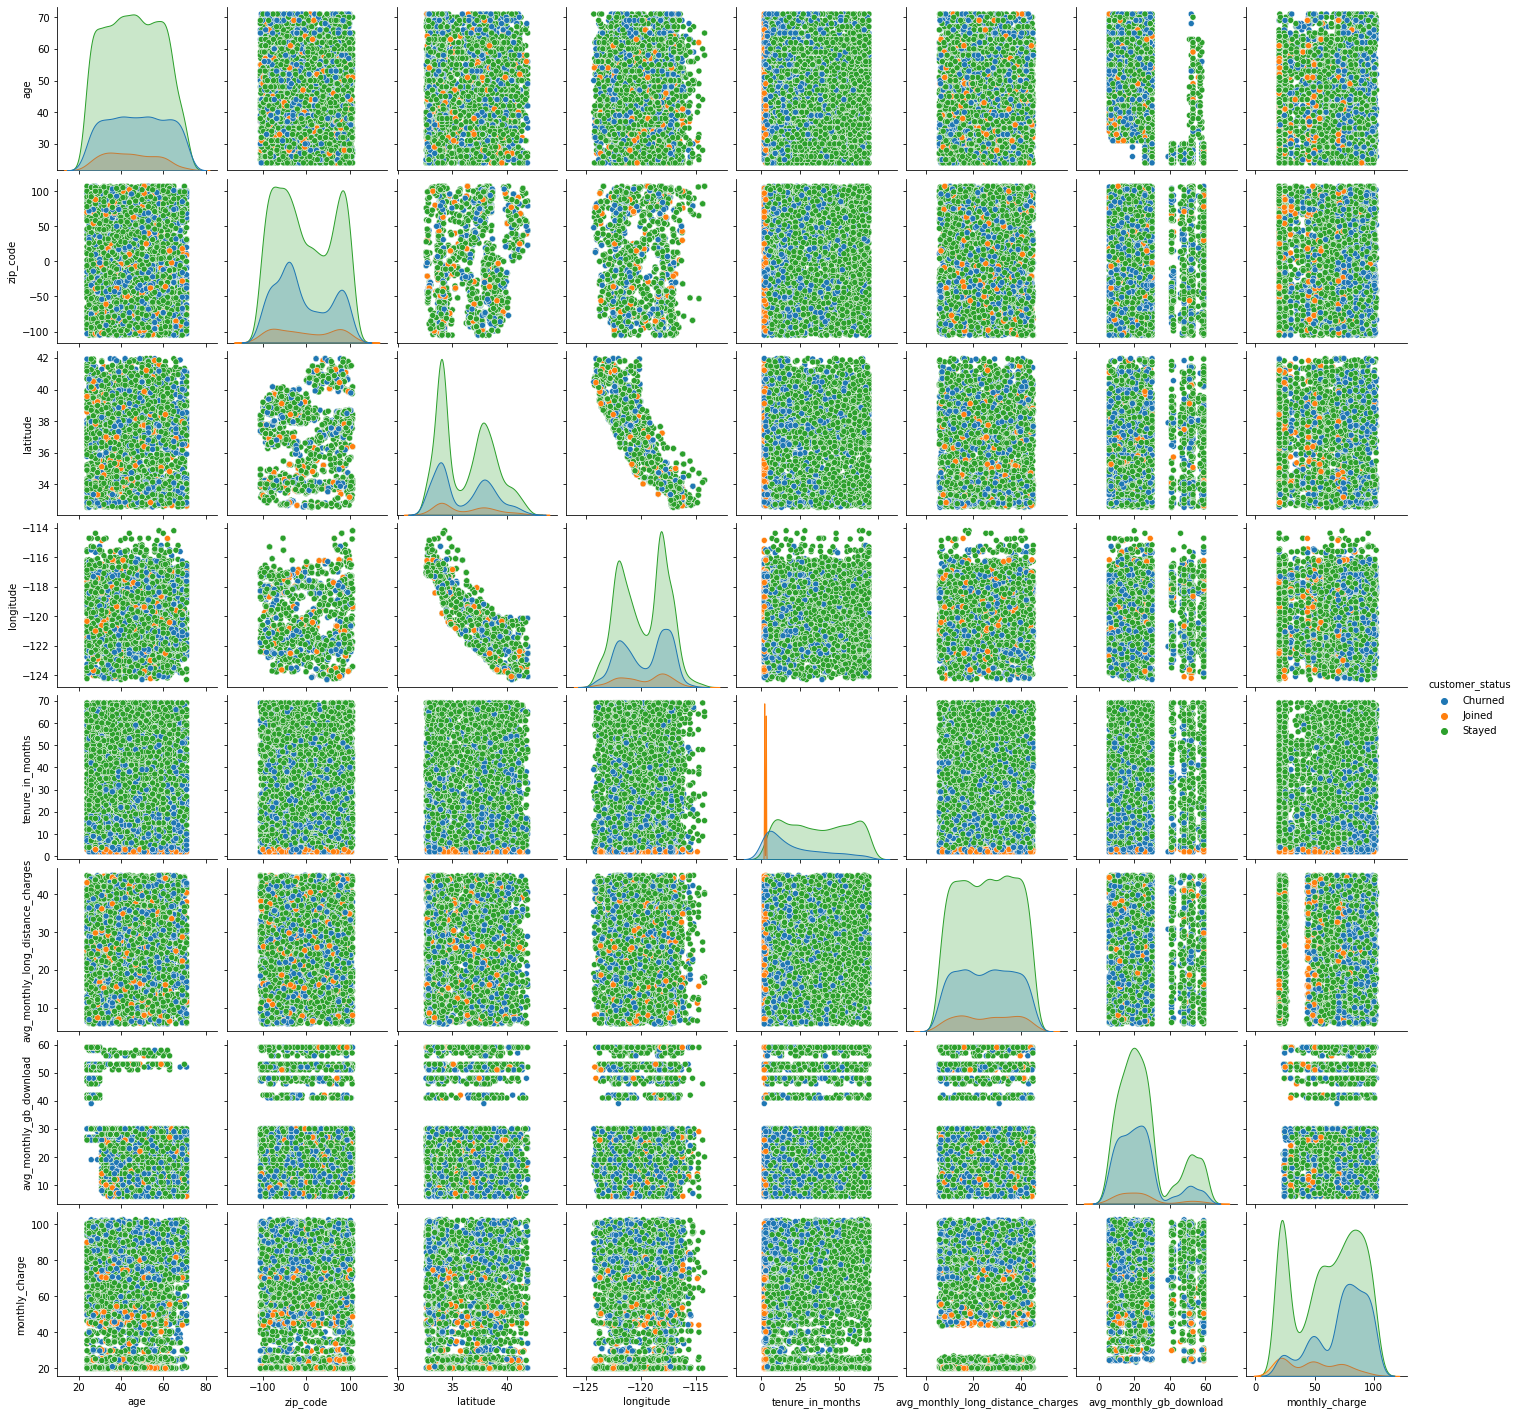

In [6]:
sns.pairplot(data, hue = 'customer_status')

In [7]:
data.isna().sum()/len(data)

gender                               0.000000
age                                  0.185858
married                              0.000000
zip_code                             0.192816
latitude                             0.000000
longitude                            0.000000
tenure_in_months                     0.179469
offer                                0.000000
phone_service                        0.000000
avg_monthly_long_distance_charges    0.277297
multiple_lines                       0.096834
internet_service                     0.000000
internet_type                        0.216669
avg_monthly_gb_download              0.337498
online_security                      0.216669
online_backup                        0.216669
device_protection_plan               0.216669
premium_tech_support                 0.216669
streaming_tv                         0.216669
streaming_movies                     0.216669
streaming_music                      0.216669
unlimited_data                    

In [8]:
data.select_dtypes('number')

age  zip_code   latitude   longitude  tenure_in_months  \
Customer ID                                                            
0002-ORFBO   37.0      41.0  34.827662 -118.999073               9.0   
0003-MKNFE   46.0      70.0  34.162515 -118.203869               9.0   
0004-TLHLJ   50.0     -45.0  33.645672 -117.922613               4.0   
0011-IGKFF    NaN      89.0  38.014457 -122.115432              13.0   
0013-EXCHZ    NaN      82.0  34.227846 -119.079903               3.0   
...           ...       ...        ...         ...               ...   
9987-LUTYD    NaN      37.0  32.759327 -116.997260              13.0   
9992-RRAMN   40.0       NaN  37.734971 -120.954271              22.0   
9992-UJOEL    NaN     -56.0  39.108252 -123.645121               2.0   
9993-LHIEB    NaN     -85.0  33.001813 -117.263628              67.0   
9995-HOTOH   36.0       NaN  39.600599 -120.636358              63.0   

             avg_monthly_long_distance_charges  avg_monthly_gb_download  \
Customer ID                                                               
0002-ORFBO                               42.39                     16.0   
0003-MKNFE                               10.69                     10.0   
0004-TLHLJ                               33.65                     30.0   
0011-IGKFF                               27.82                      NaN   
0013-EXCHZ                                7.38                     11.0   
...                                        ...                      ...   
9987-LUTYD                                 NaN                     59.0   
9992-RRAMN                               16.20                     17.0   
9992-UJOEL                               18.62                     51.0   
9993-LHIEB                                 NaN                     58.0   
9995-HOTOH                                 NaN                      NaN   

             monthly_charge  
Customer ID                  
0002-ORFBO            65.60  
0003-MKNFE              NaN  
0004-TLHLJ            73.90  
0011-IGKFF            98.00  
0013-EXCHZ            83.90  
...                     ...  
9987-LUTYD            55.15  
9992-RRAMN            85.10  
9992-UJOEL            50.30  
9993-LHIEB            67.85  
9995-HOTOH            59.00  

[7043 rows x 8 columns]

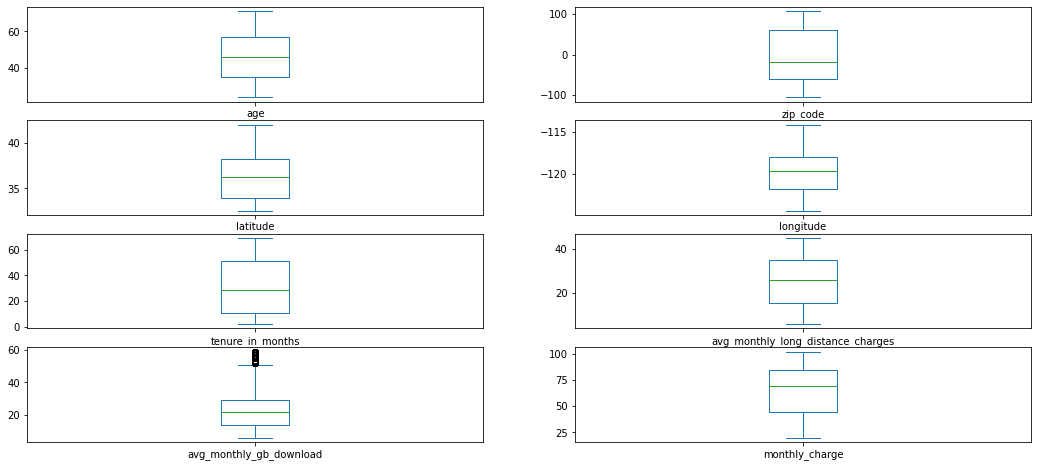

In [9]:
data.select_dtypes('number').plot(kind='box',subplots=True, layout=(4,2),figsize=(18,8));

# Split


In [10]:
X = data.drop(['offer','customer_status'], axis = 1)
y = data.customer_status

In [11]:
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Model

In [12]:
clf = make_pipeline(
    SimpleImputer(strategy = 'most_frequent'),
    OneHotEncoder(use_cat_names = True),
    StandardScaler(),
    DecisionTreeClassifier(max_depth = 50, random_state = 42)
)

In [13]:
clf.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(cols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                     13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                     24],
                               use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=50, random_state=42))])

# Evaluation 

In [14]:
clf.score(X_train, y_train)
clf.score(X_test, y_test)

0.9914833215046132

In [15]:
clf.predict(X_test)[:10]

array(['Stayed', 'Stayed', 'Stayed', 'Joined', 'Stayed', 'Churned',
       'Stayed', 'Stayed', 'Stayed', 'Stayed'], dtype=object)

In [16]:
clf.predict_proba(X_test)[:10]

array([[0.00656096, 0.00273373, 0.9907053 ],
       [0.00671141, 0.        , 0.99328859],
       [0.00656096, 0.00273373, 0.9907053 ],
       [0.        , 1.        , 0.        ],
       [0.00656096, 0.00273373, 0.9907053 ],
       [1.        , 0.        , 0.        ],
       [0.00656096, 0.00273373, 0.9907053 ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [0.00656096, 0.00273373, 0.9907053 ]])

### Communication

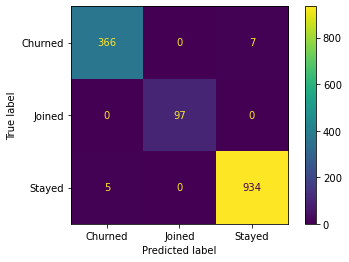

In [17]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

In [18]:
#data imputation manaually
def impute(data):
    columns = data.columns
    for col in columns:
        if data[col].dtypes == 'int' or data[col].dtypes == 'float':
            data[col] = data[col].fillna(np.mean(data[col], axis = 0))

        elif data[col].dtypes == 'category' or data[col].dtypes == 'object':
            data[col] = data[col].fillna(stats.mode(data[col]), axis = 0)
        else: 
            print('no')
            return data

In [19]:
#impute(data)

# Save Model

In [20]:
with open('Best_churn_model.pkl', 'wb') as f:
    pickle.dump(clf, f)